# **1. Perkenalan Dataset**


Dataset **Telco Customer Churn dataset**. Dataset ini sering dipakai untuk analisis prediksi **churn** (pelanggan berhenti berlangganan). Ada 7043 baris data (pelanggan) dengan 21 kolom (fitur).

Sumber Dataset Kaggle : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

---

### Penjelasan Kolom

1. **customerID** → ID unik tiap pelanggan.
2. **gender** → Jenis kelamin pelanggan (`Male` / `Female`).
3. **SeniorCitizen** → Status lansia pelanggan (`0 = bukan`, `1 = lansia`).
4. **Partner** → Apakah pelanggan punya pasangan (`Yes` / `No`).
5. **Dependents** → Apakah punya tanggungan anak/keluarga (`Yes` / `No`).
6. **tenure** → Lama berlangganan (dalam bulan).
7. **PhoneService** → Apakah pelanggan berlangganan layanan telepon (`Yes` / `No`).
8. **MultipleLines** → Apakah punya lebih dari satu line telepon (`Yes`, `No`, atau `No phone service`).
9. **InternetService** → Jenis layanan internet (`DSL`, `Fiber optic`, `No`).
10. **OnlineSecurity** → Tambahan layanan keamanan online (`Yes`, `No`, `No internet service`).
11. **OnlineBackup** → Tambahan layanan backup online (`Yes`, `No`, `No internet service`).
12. **DeviceProtection** → Proteksi perangkat (`Yes`, `No`, `No internet service`).
13. **TechSupport** → Dukungan teknis (`Yes`, `No`, `No internet service`).
14. **StreamingTV** → Layanan streaming TV (`Yes`, `No`, `No internet service`).
15. **StreamingMovies** → Layanan streaming film (`Yes`, `No`, `No internet service`).
16. **Contract** → Jenis kontrak pelanggan (`Month-to-month`, `One year`, `Two year`).
17. **PaperlessBilling** → Apakah tagihan tanpa kertas (`Yes` / `No`).
18. **PaymentMethod** → Metode pembayaran (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`).
19. **MonthlyCharges** → Biaya bulanan (float).
20. **TotalCharges** → Total biaya yang sudah dibayar pelanggan (`object`).
21. **Churn** → Target/label → Apakah pelanggan berhenti berlangganan (`Yes` / `No`).

---

### Insight

* Dataset ini adalah **klasifikasi biner**, targetnya adalah **Churn** (`Yes/No`).
* Banyak kolom kategorikal (`object`) yang perlu di-*encode* sebelum masuk ke model.
* **TotalCharges** harus dikonversi ke numerik (karena masih `object`).
* Variabel penting yang biasanya memengaruhi churn: **Contract, tenure, MonthlyCharges, PaymentMethod, InternetService, dll.**

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [26]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings("ignore")

# Supaya pandas menampilkan semua elemen array
pd.set_option("display.max_colwidth", None)   # panjang teks
# pd.set_option("display.max_rows", None)       # semua baris
pd.reset_option("display.max_rows")
pd.set_option("display.max_columns", None)    # semua kolom
pd.set_option("display.width", None)          # jangan pecah baris otomatis


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [27]:
data = pd.read_csv('../Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Menampilkan Info dari dataset

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insight : Berdasarkan info yang didapat dari dataset terdapat 7.043 baris dan 21 kolom.

Mengubah tipe data pada kolom TotalCharges

In [29]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"].str.strip(), errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insight : Karena isi kolom pada TotalCharges angka, maka tipe datanya perlu diubah ke tipe data numerik (float) agar bisa dianalisis. 

Menampilkan statistik deskriptif dari kolom numerik dalam DataFrame

In [30]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


insight hasil data.describe() di atas
- SeniorCitizen: rata-rata 0.16 → hanya sekitar 16% pelanggan lansia, mayoritas bukan lansia.
- Tenure: rata-rata 32 bulan (maks 72) → artinya rata-rata pelanggan sudah berlangganan sekitar 2,5 tahun.
- MonthlyCharges: rata-rata $64,76, dengan sebaran biaya dari $18–$118, menunjukkan variasi paket layanan.
- TotalCharges: rata-rata $2.283, naik seiring lama berlangganan — pelanggan lama cenderung memiliki total biaya lebih besar.

Menampilkan kolom numerik dan kategorikal

In [31]:
num_cols = data.select_dtypes(include=['number']).columns.tolist()
cat_cols = data.select_dtypes(exclude=['number']).columns.drop('customerID').tolist()

print("Kolom numerik:", num_cols)
print("Kolom kategorikal:", cat_cols)

Kolom numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Kolom kategorikal: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Menampilkan distribusi data pada kolom numerik

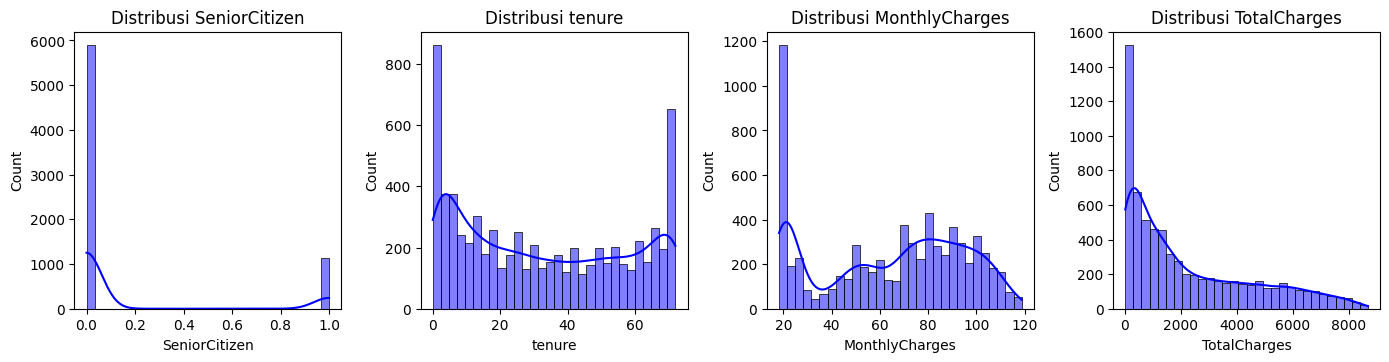

In [32]:
# Distribusi fitur numerik
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Menampilkan distribusi data pada kolom kategori

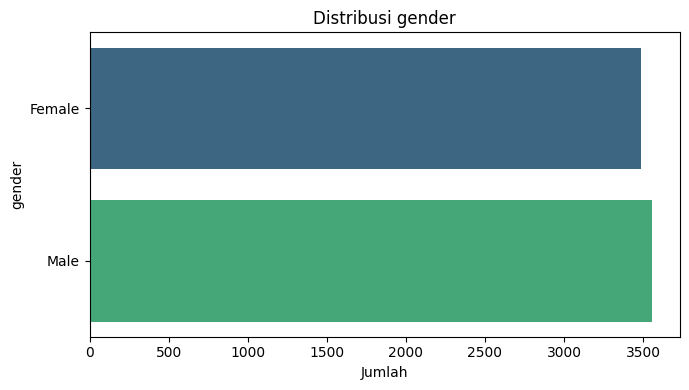

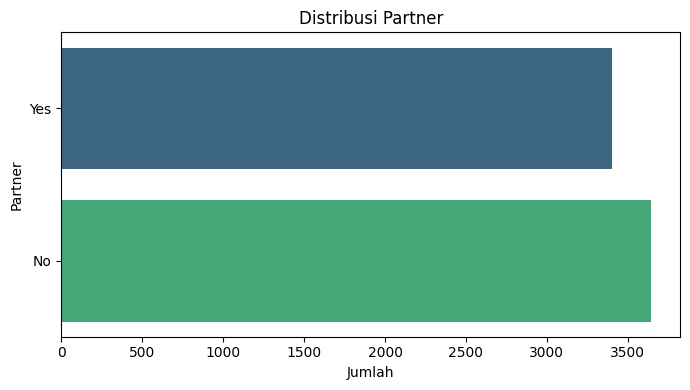

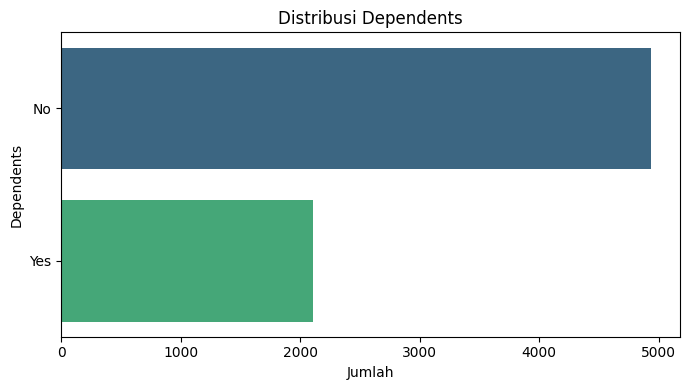

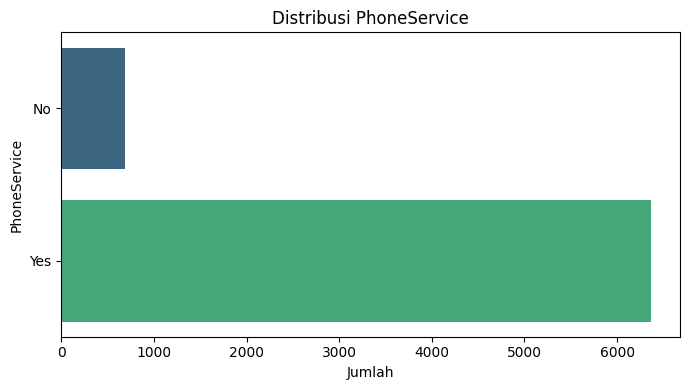

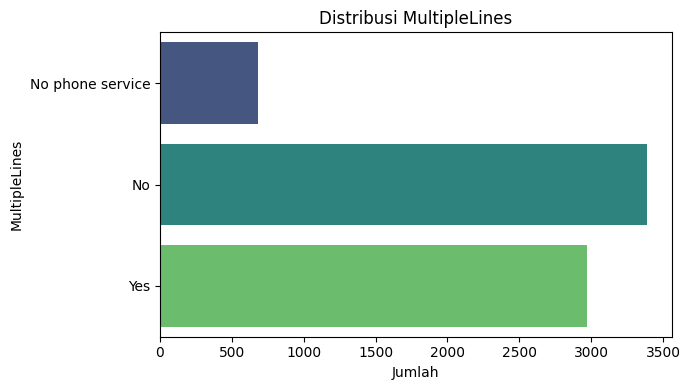

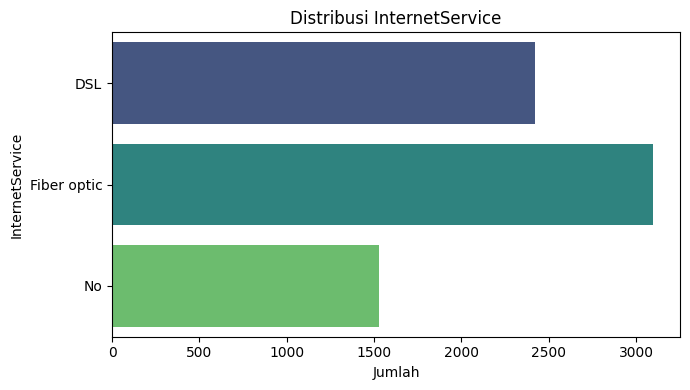

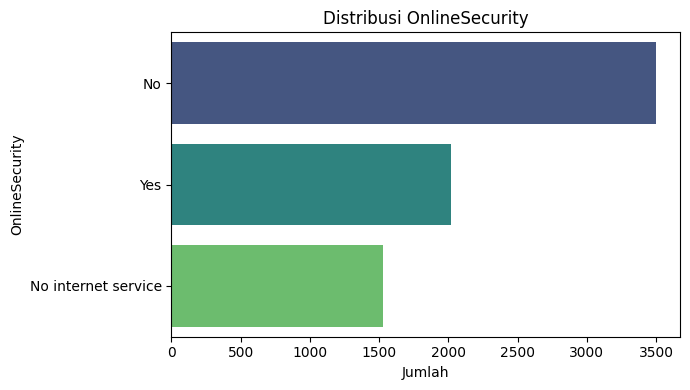

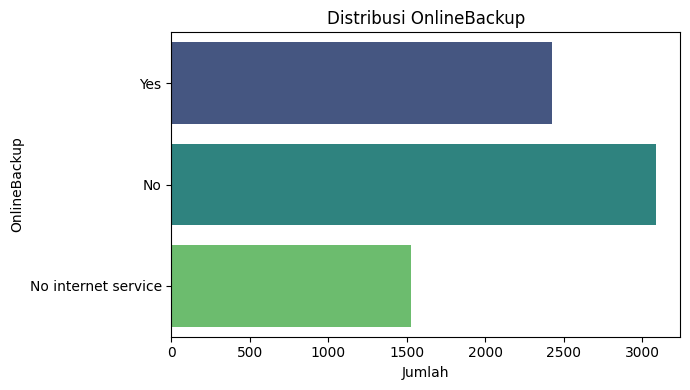

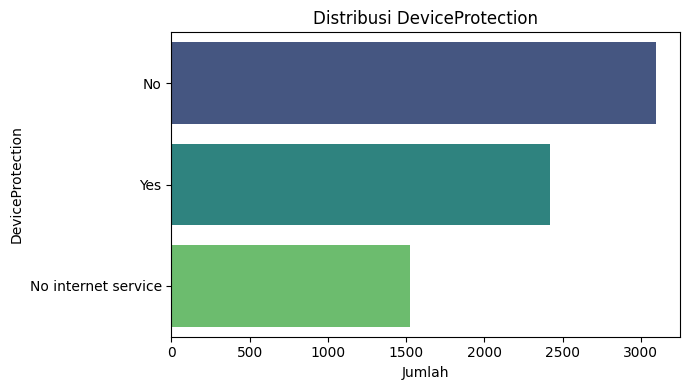

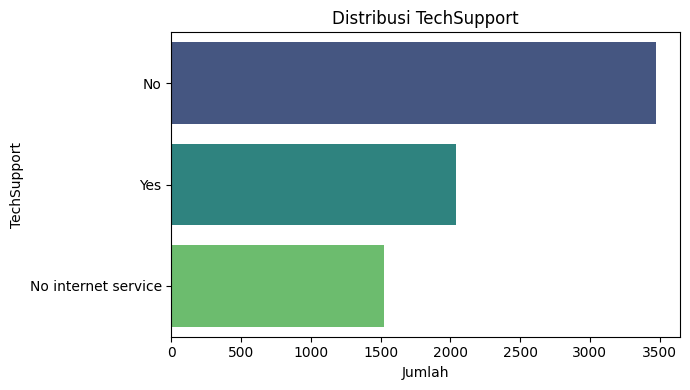

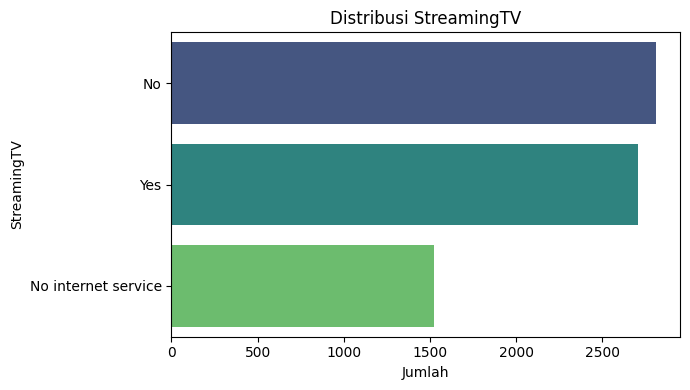

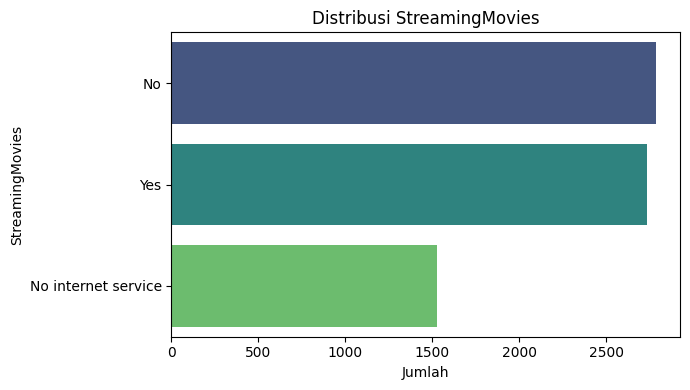

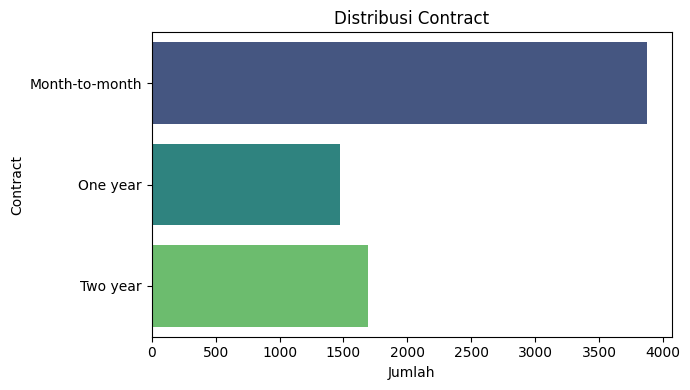

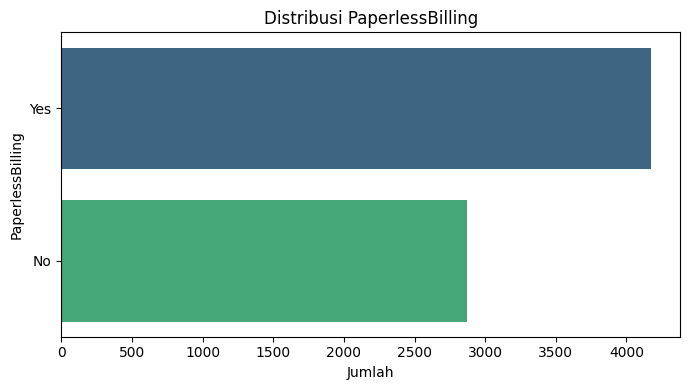

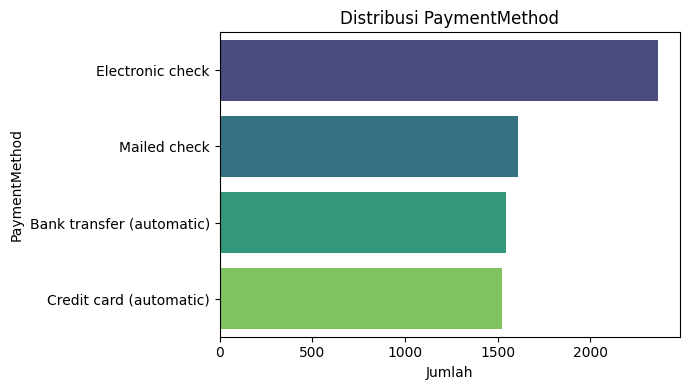

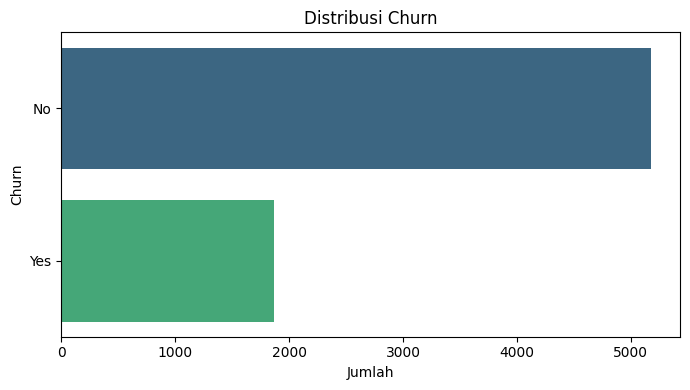

In [33]:
# buat plot distribusi untuk setiap kolom kategori
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(y=data[col], hue=data[col], palette="viridis", legend=False)
    plt.title(f"Distribusi {col}")
    plt.xlabel("Jumlah")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Menampilkan metrik korelasi fitur numerik

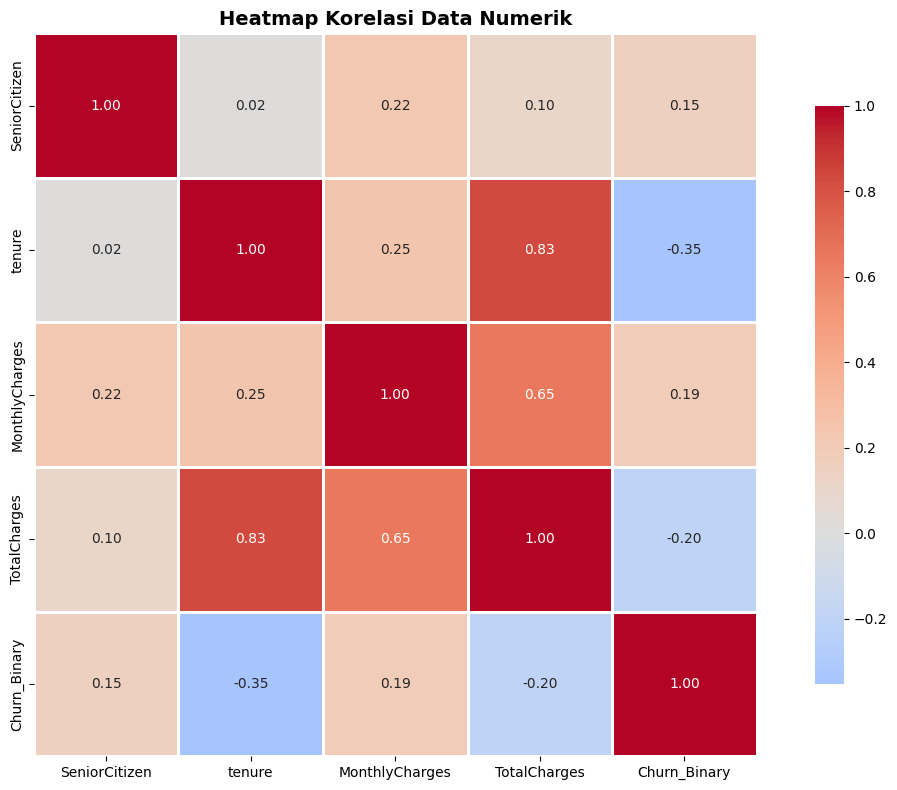

Features Most Correlated with Churn:
Churn_Binary      1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_Binary, dtype: float64


In [34]:
# Create correlation heatmap
numeric_df = data.select_dtypes(include=['int64', 'float64']).copy()
numeric_df['Churn_Binary'] = (data['Churn'] == 'Yes').astype(int)

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Data Numerik', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlated features with Churn
print("Features Most Correlated with Churn:")
churn_corr = correlation_matrix['Churn_Binary'].sort_values(ascending=False)
print(churn_corr.head(10))

Menampilkan korelasi fitur kategori

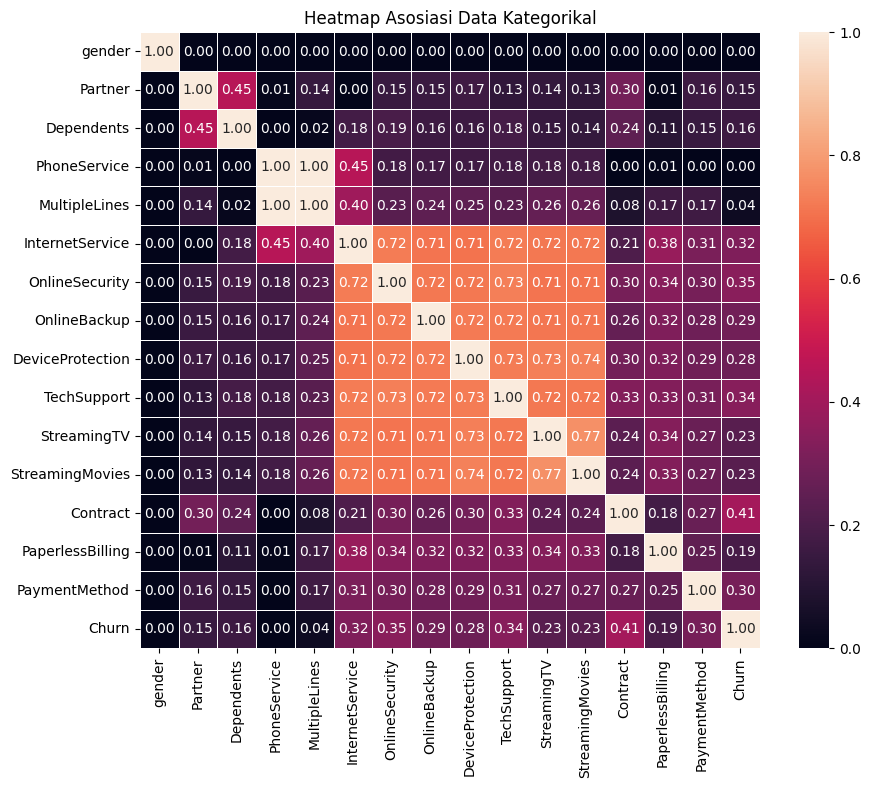

In [35]:
# Heatmap untuk data kategorikal (Cramér’s V)
def cramers_v(x, y):
    """Menghitung Cramér’s V untuk asosiasi antar kolom kategorikal"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
if "customerID" in cat_cols:  # buang kolom ID
    cat_cols.remove("customerID")

# buat matriks Cramér’s V
cramers_results = pd.DataFrame(
    np.zeros((len(cat_cols), len(cat_cols))),
    index=cat_cols, columns=cat_cols
)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(data[col1], data[col2])

plt.figure(figsize=(10,8))
sns.heatmap(cramers_results, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap Asosiasi Data Kategorikal")
plt.show()


Memilih kolom kategori dengan nilai korelasi terhadap churn >0.3

In [36]:
# --- kolom numerik ---
num_cols = data.select_dtypes(include=["number"]).columns.tolist()

# --- kolom kategorikal ---
cat_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
if "customerID" in cat_cols:
    cat_cols.remove("customerID")

# hitung korelasi kategori dengan target 'Churn'
selected_cat_cols = []
for col in cat_cols:
    if col != "Churn":
        score = cramers_v(data[col], data["Churn"])
        if score > 0.3:
            selected_cat_cols.append(col)
            print(f"{col} → Cramér’s V: {score:.3f}")

print("Kolom kategorikal terpilih:", selected_cat_cols)

InternetService → Cramér’s V: 0.322
OnlineSecurity → Cramér’s V: 0.347
TechSupport → Cramér’s V: 0.343
Contract → Cramér’s V: 0.410
PaymentMethod → Cramér’s V: 0.303
Kolom kategorikal terpilih: ['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


insight: berdasarkan hasil nilai korelasi, kolom kategorikal terpilih adalah: ['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']

Melakukan pengecekan nilai duplikat

In [37]:
# Cek nilai duplikat
duplicate_rows = data[data.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


Insight : berdasaekan hasil pengecekan tidak terdapat nilai duplikat pada data

Melakukan pengecekan nilai null

In [38]:
# cek nilai null
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Insight: Berdasarkan hasil pengecekan terdapat nilai null pada kolom TotalCharges

# **5. Data Preprocessing**

Memilih kolom yang akan digunakan

In [39]:
# Memilih kolom yang akan digunakan
df = data[selected_cat_cols + ['SeniorCitizen', 'MonthlyCharges', 'Churn']].copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InternetService  7043 non-null   object 
 1   OnlineSecurity   7043 non-null   object 
 2   TechSupport      7043 non-null   object 
 3   Contract         7043 non-null   object 
 4   PaymentMethod    7043 non-null   object 
 5   SeniorCitizen    7043 non-null   int64  
 6   MonthlyCharges   7043 non-null   float64
 7   Churn            7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


Insight: Berdasarkan hasil analisis kolom yang akan digunakan adalah ['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod', 'SeniorCitizen', 'MonthlyCharges', 'Churn']

Menampilkan statistik deskriptif untuk semua kolom yang dipilih

In [40]:
df.describe(include='all')

,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod,SeniorCitizen,MonthlyCharges,Churn
count,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,3,3,3,3,4,NaN,NaN,2
top,Fiber optic,No,No,Month-to-month,Electronic check,NaN,NaN,No
freq,3096,3498,3473,3875,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,NaN,0.162147,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,0.368612,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,89.850000,NaN


Menampilkan distribusi data untuk semua kolom yang dipilih

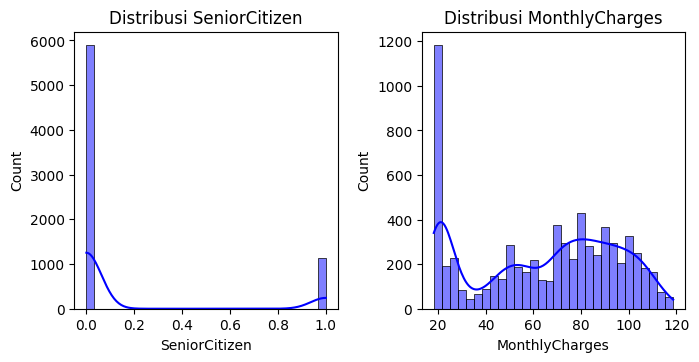

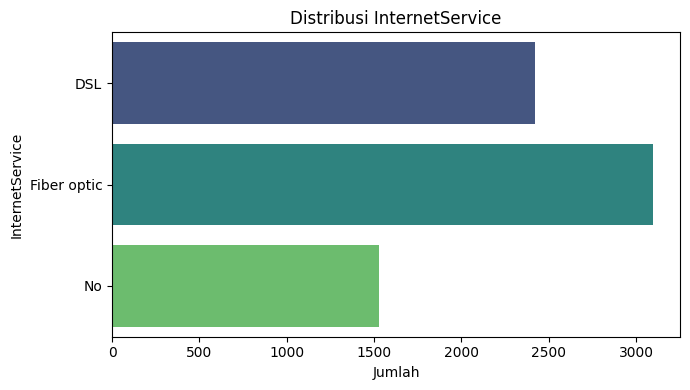

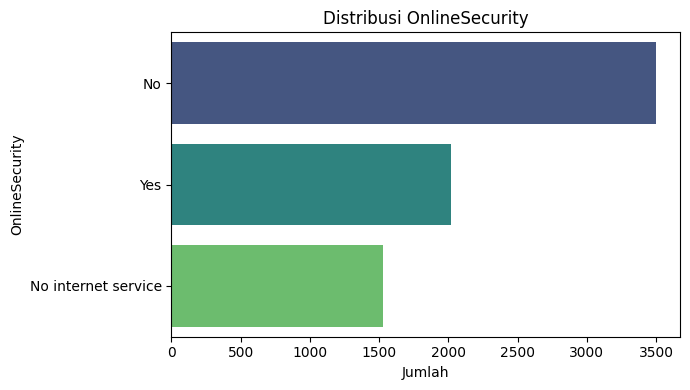

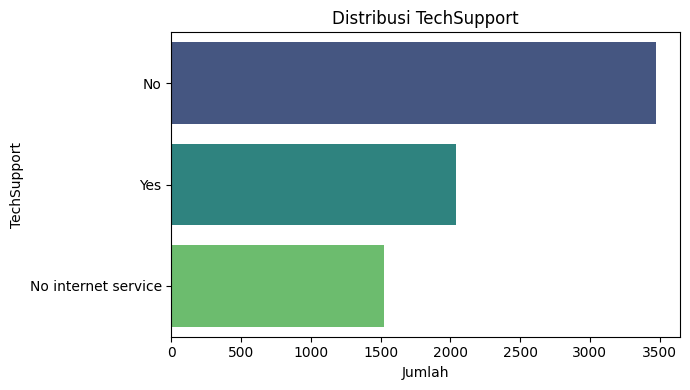

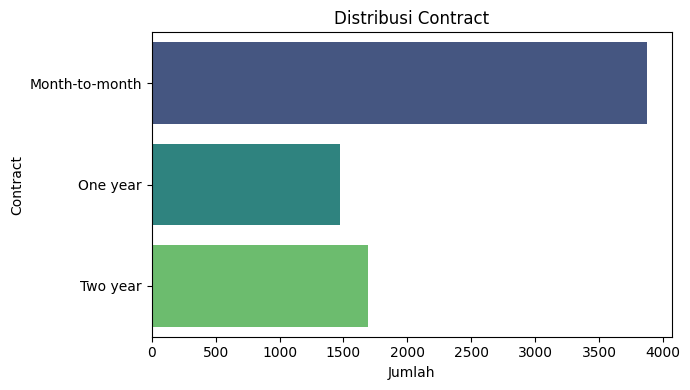

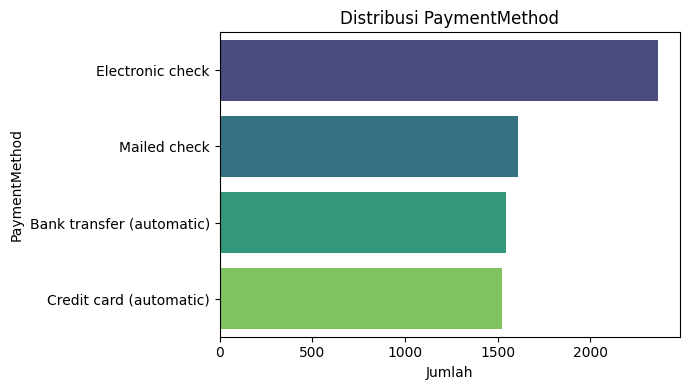

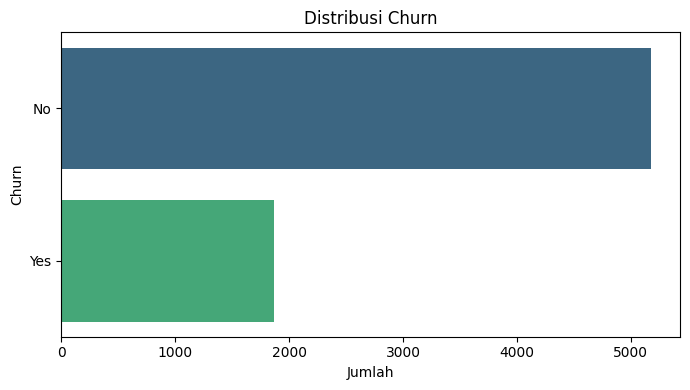

In [41]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(y=data[col], hue=data[col], palette="viridis", legend=False)
    plt.title(f"Distribusi {col}")
    plt.xlabel("Jumlah")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [42]:
df.columns

Index(['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract',
       'PaymentMethod', 'SeniorCitizen', 'MonthlyCharges', 'Churn'],
      dtype='object')

Melakukan binning pada kolom MonthlyCharges dengan label rendah, sedang dan tinggi

In [43]:
# binning otomatis kolom MonthlyCharges rendah, sedang, tinggi
df_binned = df.copy().drop(['MonthlyCharges'], axis=1)
df_binned['MonthlyCharges'] = pd.cut(df['MonthlyCharges'], bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Pindahkan kolom MonthlyCharges sebelum Churn
df_binned = df_binned[[ 
    'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract',
    'PaymentMethod', 'SeniorCitizen', 'MonthlyCharges', 'Churn'
]]

df_binned.head()

,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod,SeniorCitizen,MonthlyCharges,Churn
0,DSL,No,No,Month-to-month,Electronic check,0,Rendah,No
1,DSL,Yes,No,One year,Mailed check,0,Sedang,No
2,DSL,Yes,No,Month-to-month,Mailed check,0,Sedang,Yes
3,DSL,Yes,Yes,One year,Bank transfer (automatic),0,Rendah,No
4,Fiber optic,No,No,Month-to-month,Electronic check,0,Sedang,Yes


In [44]:
# df_binned.to_csv('preproses.csv', index=False)

Menampilkan plot distribusi data sebelum dan sesudah binning

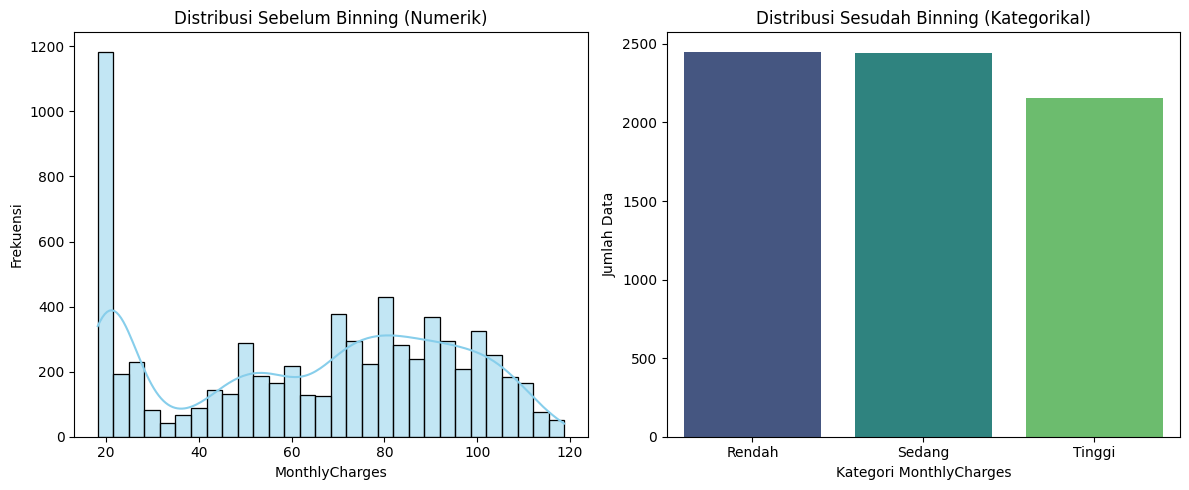

In [45]:
# Membuat 2 plot berdampingan
plt.figure(figsize=(12, 5))

# Plot sebelum binning
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Sebelum Binning (Numerik)')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frekuensi')

# Plot sesudah binning
plt.subplot(1, 2, 2)
sns.countplot(x='MonthlyCharges', data=df_binned, palette='viridis')
plt.title('Distribusi Sesudah Binning (Kategorikal)')
plt.xlabel('Kategori MonthlyCharges')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

Melakukan encoding pada data kategorikal

In [46]:
mappings = {
    'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
    'OnlineSecurity':  {'No': 0, 'No internet service': 1, 'Yes': 2},
    'TechSupport':     {'No': 0, 'No internet service': 1, 'Yes': 2},
    'Contract':        {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    'PaymentMethod':   {
        'Bank transfer (automatic)': 0, 
        'Credit card (automatic)': 1, 
        'Electronic check': 2, 
        'Mailed check': 3
    },
    'MonthlyCharges':  {'Rendah': 0, 'Sedang': 1, 'Tinggi': 2},
    'Churn':           {'No': 0, 'Yes': 1}
}

for col, mapping in mappings.items():
    if col in df_binned.columns:
        print(f"Mapping kolom: {col}")
        df_binned[col] = df_binned[col].replace(mapping)
        
        # Opsional: Pastikan tipe datanya integer
        try:
            df_binned[col] = df_binned[col].astype(int)
        except:
            print(f"Gagal mengubah {col} ke integer, cek apakah ada nilai null/typo.")

df_binned

Mapping kolom: InternetService
Mapping kolom: OnlineSecurity
Mapping kolom: TechSupport
Mapping kolom: Contract
Mapping kolom: PaymentMethod
Mapping kolom: MonthlyCharges
Mapping kolom: Churn


,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod,SeniorCitizen,MonthlyCharges,Churn
0,0,0,0,0,2,0,0,0
1,0,2,0,1,3,0,1,0
2,0,2,0,0,3,0,1,1
3,0,2,2,1,0,0,0,0
4,1,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...
7038,0,2,2,1,3,0,1,0
7039,1,0,0,1,1,0,2,0
7040,0,2,0,0,2,0,0,0
7041,1,0,0,0,3,1,1,1


Menyimpan data yang siap untuk pelatihan model.

In [47]:
# simpan data
df_binned.to_csv('Telco-Customer-Churn_preprocessing.csv', index=False)